In [ ]:
import numpy as np
import pandas as pd
from timeit import default_timer as timer

Load DataFrames

In [ ]:
df_20_04_party= pd.read_csv("df_20_04_party.csv")
df_20_04_candidate= pd.read_csv("df_20_04_candidate.csv")
df_20_04_common= pd.read_csv("df_20_04_common.csv")
df_93_99_party= pd.read_csv("df_93_99_party.csv")
df_93_99_candidate= pd.read_csv("df_93_99_candidate.csv")
df_93_99_common= pd.read_csv("df_93_99_common.csv")
df_current= pd.read_csv("df_current.csv")

View Columns

In [ ]:
print('2000-2004 party DataFrame columns  : \n', df_20_04_party.columns,'\n\n')
print('2000-2004 Candidate DataFrame columns  : \n', df_20_04_candidate.columns,'\n\n')
print('2000-2004 Common DataFrame columns  : \n', df_20_04_common.columns,'\n\n')
print('1993-1999 party DataFrame columns  : \n', df_93_99_party.columns,'\n\n')
print('1993-1999 Candidate DataFrame columns  : \n', df_93_99_candidate.columns,'\n\n')
print('1993-1999 Common DataFrame columns  : \n', df_93_99_common.columns,'\n\n')
print('2004-Present DataFrame columns  : \n', df_20_04_party.columns,'\n\n')

2000-2004 party DataFrame columns  : 
 Index(['Table_Index_Key'], dtype='object') 


2000-2004 Candidate DataFrame columns  : 
 Index(['Electoral District',
       'Address of organization that contribution was given through',
       'Table_Index_Key'],
      dtype='object') 


2000-2004 Common DataFrame columns  : 
 Index(['Recipient', ' Contributor name', 'Contribution given through',
       'Political Entity', 'Non-Monetary amount', 'Political Party',
       'Financial Report', 'Part Number of Return', 'Contributor City',
       'Contributor type', 'Form ID', 'Fiscal date', 'Contributor Province',
       'Contributor Postal code', 'Monetary amount',
       'Type of organization that contribution was given through',
       'Recipient ID', 'Financial Report part', 'Table_Index_Key',
       'Electoral event'],
      dtype='object') 


1993-1999 party DataFrame columns  : 
 Index(['Table_Index_Key'], dtype='object') 


1993-1999 Candidate DataFrame columns  : 
 Index(['Electoral Distric

SQL Queries

In [ ]:
# Creating the database
import sqlite3

In [ ]:
conn = sqlite3.connect('election_database')
c = conn.cursor()
c.execute('CREATE TABLE IF NOT EXISTS df_20_04_party (Table_Index_Key)')
conn.commit()
c.execute('CREATE TABLE IF NOT EXISTS df_20_04_candidate (Electoral_District,contribution_organization_Address,Table_Index_Key)')
conn.commit()
c.execute('CREATE TABLE IF NOT EXISTS df_93_99_party (Table_Index_Key)')
conn.commit() 
c.execute('CREATE TABLE IF NOT EXISTS df_93_99_candidate (Electoral_District, Form_ID, Part_Number_of_Return, Table_Index_Key)')
conn.commit() 
c.execute('CREATE TABLE IF NOT EXISTS df_93_99_common (Recipient, Political_Party, Contributor_type, Contributor_name, Financial_Report, Recipient_ID, Financial_Report_part, Political_Entity, Fiscal_date, Table_Index_Key, Electoral_event, Monetary_amount)')
conn.commit() 
c.execute('CREATE TABLE IF NOT EXISTS df_current (Recipient_ID, Recipient, Political_Party_of_Recipient, Electoral_District, Electoral_event, Fiscal_Election_date, Form_ID, Financial_Report, Part_Number_of_Return, Financial_Report_part, Contributor_type, Contributor_name, Contributor_City, Contributor_Province, Contributor_Postal_code, Contribution_Received_date, Monetary_amount, Contribution_given_through, Political_Entity)')
conn.commit() 


In [ ]:
# Renaming Column Headers
df_20_04_party.columns= ["Table_Index_Key"]
df_20_04_candidate.columns= ["Electoral_District","contribution_organization_Address","Table_Index_Key"]
df_20_04_common.columns= ["Recipient", "Contributor_name", "Contribution_given_through", "Political_Entity", "Non_Monetary_amount", "Political_Party", "Financial_Report", "Part_Number_of_Return", "Contributor_City", "Contributor_type", "Form_ID", "Fiscal_date", "Contributor_Province", "Contributor_Postal_code", "Monetary_amount", "Type_of_organization_that_contribution_was_given_through", "Recipient_ID", "Financial_Report_part", "Table_Index_Key", "Electoral_event"]
df_93_99_party.columns= ["Table_Index_Key"]
df_93_99_candidate.columns=["Electoral_District", "Form_ID", "Part_Number_of_Return", "Table_Index_Key"]
df_93_99_common.columns= ["Recipient", "Political_Party", "Contributor_type", "Contributor_name", "Financial_Report", "Recipient_ID", "Financial_Report_part", "Political_Entity", "Fiscal_date", "Table_Index_Key", "Electoral_event", "Monetary_amount"]
df_current.columns= ["Recipient_ID", "Recipient", "Political_Party_of_Recipient", "Electoral_District", "Electoral_event", "Fiscal_Election_date", "Form_ID", "Financial_Report", "Part_Number_of_Return", "Financial_Report_part", "Contributor_type", "Contributor_name", "Contributor_City", "Contributor_Province", "Contributor_Postal_code", "Contribution_Received_date", "Monetary_amount", "Contribution_given_through", "Political_Entity"]

**Time complexity for Insertion using Pandas Dataframes**

In [ ]:
# Taking 25%
count_25=int((25*df_current.shape[0])/100)

# Taking 50%
count_50=int((50*df_current.shape[0])/100)

# Taking 75%
count_75=int((75*df_current.shape[0])/100)

# Taking 100%
count_100=df_current.shape[0]

execution_time=[]

In [ ]:
print(count_25)
print(count_50)
print(count_75)
print(count_100)

18526
37052
55578
74104


In [ ]:
# Insertion of 25% of the Dataframe 
start_25=timer()
df_current[:count_25].to_sql('df_current', conn, if_exists='replace', index = False)
end_25=timer()

# Insertion of 50% of the Dataframe 
start_50=timer()
df_current[:count_50].to_sql('df_current', conn, if_exists='replace', index = False)
end_50=timer()

# Insertion of 75% of the Dataframe 
start_75=timer()
df_current[:count_75].to_sql('df_current', conn, if_exists='replace', index = False)
end_75=timer()

# Insertion of 100% of the Dataframe 
start_100=timer()
df_current[:count_100].to_sql('df_current', conn, if_exists='replace', index = False)
end_100=timer()

# Appending execution time
execution_time.append(end_25-start_25)
execution_time.append(end_50-start_50)
execution_time.append(end_75-start_75)
execution_time.append(end_100-start_100)

In [ ]:
# List for Execution Times
execution_time

[0.5024843409999846, 0.7681964370000003, 1.5002855769999996, 2.047459599000007]

**Time complexity for Insertion using SQL Queries**

In [ ]:
sql_insert_execution_time=[]

# Inserting 25% of data
sql_insert_start_25=timer()
for i in range(count_25):
  values = tuple(df_current.iloc[i])
  c.execute("insert into df_current values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", values)
sql_insert_end_25=timer()

# Inserting 50% of data
sql_insert_start_50=timer()
for i in range(count_50):
  values = tuple(df_current.iloc[i])
  c.execute("insert into df_current values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", values)
sql_insert_end_50=timer()


# Inserting 75% of data
sql_insert_start_75=timer()
for i in range(count_75):
  values = tuple(df_current.iloc[i])
  c.execute("insert into df_current values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", values)
sql_insert_end_75=timer()


# Inserting 100% of data
sql_insert_start_100=timer()
for i in range(count_100):
  values = tuple(df_current.iloc[i])
  c.execute("insert into df_current values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", values)
sql_insert_end_100=timer()


# Appending execution time
sql_insert_execution_time.append(sql_insert_end_25-sql_insert_start_25)
sql_insert_execution_time.append(sql_insert_end_50-sql_insert_start_50)
sql_insert_execution_time.append(sql_insert_end_75-sql_insert_start_75)
sql_insert_execution_time.append(sql_insert_end_100-sql_insert_start_100)

In [ ]:
sql_insert_execution_time

[3.4983265909999943, 6.722010602000012, 9.938572319000002, 12.906082773999998]

Graph  for Insertion Time Complexity

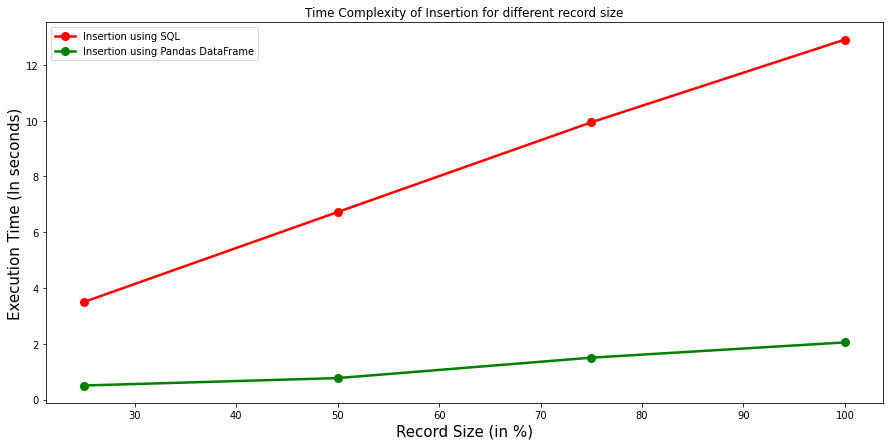

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# List for % of data
count_percent=[25,50,75,100]
figure(figsize=(15,7))
plt.plot(count_percent,sql_insert_execution_time, 'ro-', label = "Insertion using SQL", linewidth = '2.5',markersize=8)
plt.plot(count_percent,execution_time, 'go-', label = "Insertion using Pandas DataFrame", linewidth = '2.5',markersize=8)
plt.title("Time Complexity of Insertion for different record size")
plt.xlabel("Record Size (in %)",fontsize=15)  
plt.ylabel("Execution Time (In seconds)",fontsize=15)

plt.legend()
plt.show()

Time Complexity for Fetching Data from using SQL queries


In [ ]:
Fetch_sql_execution_time=[]

# Fetching 100% of the data from the df_current

fetch_sql_start_100=timer()
for i in c.execute('''SELECT * FROM df_current LIMIT 3360058'''):
  continue
fetch_sql_end_100=timer()

# Fetching 75% of the data from the df_current

fetch_sql_start_75=timer()
for i in c.execute('''SELECT * FROM df_current LIMIT 2520043'''):
  continue
fetch_sql_end_75=timer()


# Fetching 50% of the data from the df_current

fetch_sql_start_50=timer()
for i in c.execute('''SELECT * FROM df_current LIMIT 1680029'''):
  continue
fetch_sql_end_50=timer()


# Fetching 25% of the data from the df_current

fetch_sql_start_25=timer()
for i in c.execute('''SELECT * FROM df_current LIMIT 840014'''):
  continue
fetch_sql_end_25=timer()





Fetch_sql_execution_time.append(fetch_sql_end_100-fetch_sql_start_100)
Fetch_sql_execution_time.append(fetch_sql_end_75-fetch_sql_start_75)
Fetch_sql_execution_time.append(fetch_sql_end_50-fetch_sql_start_50)

Fetch_sql_execution_time.append(fetch_sql_end_25-fetch_sql_start_25)


#Fetch_sql_execution_time=[i*10 for i in Fetch_sql_execution_time]

In [ ]:
Fetch_sql_execution_time

[1.2263189600000715,
 1.2352829420001399,
 1.3038986560000012,
 1.2774379939999108]

Fetching Data using Pandas Dataframe

In [ ]:
df_fetch_execution_time=[]

df_fetch_start_25=timer()
df_fetch_25=pd.read_sql_query('SELECT * FROM df_current LIMIT 187251',conn)
df_fetch_end_25=timer()

df_fetch_start_50=timer()

df_fetch_50=pd.read_sql_query('SELECT * FROM df_current LIMIT 374502',conn)
df_fetch_end_50=timer()

df_fetch_start_75=timer()

df_fetch_75=pd.read_sql_query('SELECT * FROM df_current LIMIT 561753',conn)
df_fetch_end_75=timer()

df_fetch_start_100=timer()

df_fetch_100=pd.read_sql_query('SELECT * FROM df_current LIMIT 749005',conn)
df_fetch_end_100=timer()

df_fetch_execution_time.append(df_fetch_end_25-df_fetch_start_25)
df_fetch_execution_time.append(df_fetch_end_50-df_fetch_start_50)
df_fetch_execution_time.append(df_fetch_end_75-df_fetch_start_75)
df_fetch_execution_time.append(df_fetch_end_100-df_fetch_start_100)

In [ ]:
df_fetch_execution_time

[2.5737669150000784, 3.3587306860001718, 3.0658721719998994, 2.852072374000045]

Graph  for Time Complexity of Fetching Data

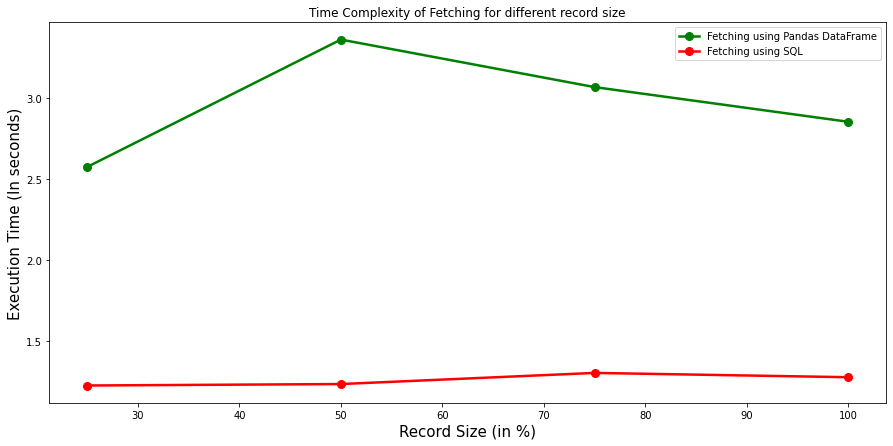

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# List for % of data
count_percent=[25,50,75,100]
figure(figsize=(15,7))
plt.plot(count_percent,df_fetch_execution_time, 'go-', label = "Fetching using Pandas DataFrame", linewidth = '2.5',markersize=8)
plt.plot(count_percent,Fetch_sql_execution_time, 'ro-', label = "Fetching using SQL", linewidth = '2.5',markersize=8)
plt.title("Time Complexity of Fetching for different record size")
plt.xlabel("Record Size (in %)",fontsize=15)  
plt.ylabel("Execution Time (In seconds)",fontsize=15)
plt.legend()
plt.show()